In [3]:
using Pkg, Revise, PyCall
import PyPlot; const plt = PyPlot
Pkg.activate("../..")
using Clapeyron

  Activating project at `~/Documents/Projects/Clapeyron.jl`
┌ Info: Precompiling Clapeyron [7c7805af-46cc-48c9-995b-ed0ed2dc909a]
└ @ Base loading.jl:1423


In [23]:
x₀ = [0.5,0.5]
T = 298.15
p = 1e5
np = 2
X0 = [0.25,0.7936385866310022,-4.02901049858986,-4.255010578067345,0.5,0.5,1.,1.]
model = PCSAFT(["methanol","cyclohexane"])

F(x) = Obj_HELD_tp_flash(model,p,T,x₀,x,np)
# F(X0)
r = Clapeyron.Solvers.optimize(F,X0)
Clapeyron.Solvers.x_sol(r)

8-element Vector{Float64}:
  0.11758047452034602
  0.7985855476372145
 -3.989161412835129
 -4.257796507996976
  0.4384483455821797
  0.5615516544178203
 -0.07929582518636252
  6.9037428069377

In [155]:
model = PCSAFT(["methanol","benzene"])
tp_flash(model,1.2e6,433.15,[0.3,0.7],HELDTPFlash(verbose=true,max_steps=15))

Stage I: Stability test and initialisation
----------------------------
Step 1: Stability test at n₀
----------------------------
Initial point found. Beginning tunneling
Negative tangent found. Moving on to step 2.
--------------------------------------
Step 2: Initialisation of dual problem
--------------------------------------
Iteration counter set to k=0
Upper bound set to UBDⱽ=-4.049271470363513
ℳ initialised
Stage II: Identification of candidate stable phases
-------------------------------------------------------
Step 3: Solve the outer problem (OPₓᵥ) at iteration k=0
-------------------------------------------------------
Presolving model
2 rows, 2 cols, 4 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-4); columns 0(-2); elements 0(-6) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     : -4.0828423788e+00
HiGHS run time      :          0.00
------------------------------------------

(Clapeyron.Fractions.FractionVector{Float64, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}[[0.15001035682971195, 0.849989643170288], [0.5015509722856324, 0.4984490277143676]], [[0.07500733272412002, 0.42500702834607257], [0.2507682833340982, 0.2492173555957095]], -4.085670235649667)

In [94]:
revise(Clapeyron)

┌ Warning: Replacing docs for `Clapeyron.HELDTPFlash :: Union{}` in module `Clapeyron`
└ @ Base.Docs docs/Docs.jl:240


true

In [158]:
(x_sol,ϕ,G) = tp_flash(model,1.2e6,433.15,[0.3,0.7])

([0.07404803640778408 0.9259519635922159; 0.41045937681221645 0.5895406231877834], [0.024313389512788195 0.30403278537959993; 0.27568661048721177 0.3959672146204], -4.072109647957072)

In [69]:
(x_sol,ϕ,G) = tp_flash(model,1e5,298.15,[0.5,0.5])

([0.1611399584429744 0.8388600415570256; 0.9183943633593382 0.08160563664066176], [0.08903223261137029 0.463482695849889; 0.4109677673886297 0.03651730415011101], -5.922843099718605)

In [166]:
x = range(0.,1.,length=100)
X = Clapeyron.Fractions.FractionVector.(x)
g_mix = mixing.(model,1.2e6,433.15,X,gibbs_free_energy)/8.314/298.15;
g_init = mixing(model,1.2e6,433.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15

-0.5974310824889324

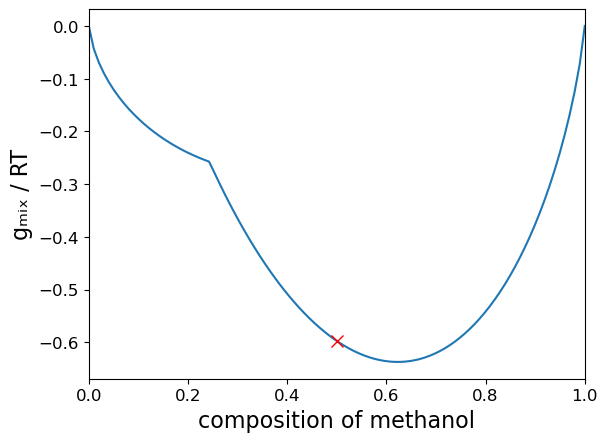

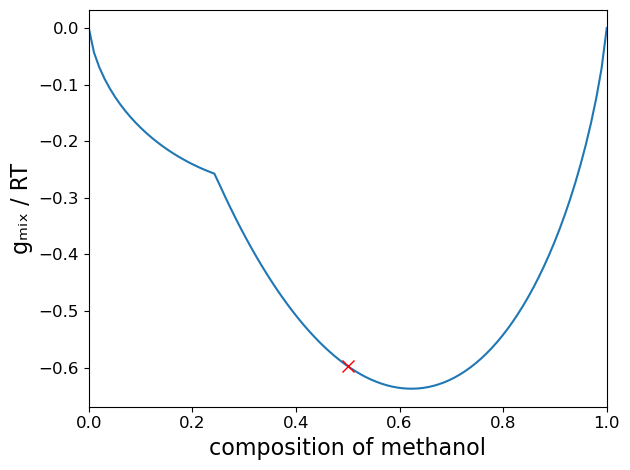

In [160]:
plt.clf()
plt.plot(x,g_mix,linestyle="-")
plt.plot(0.5,g_init,marker="x",color="r",markersize=8)
plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
# plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_1.pdf")

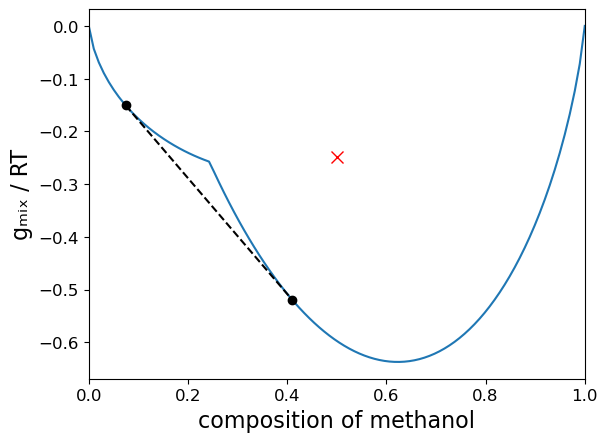

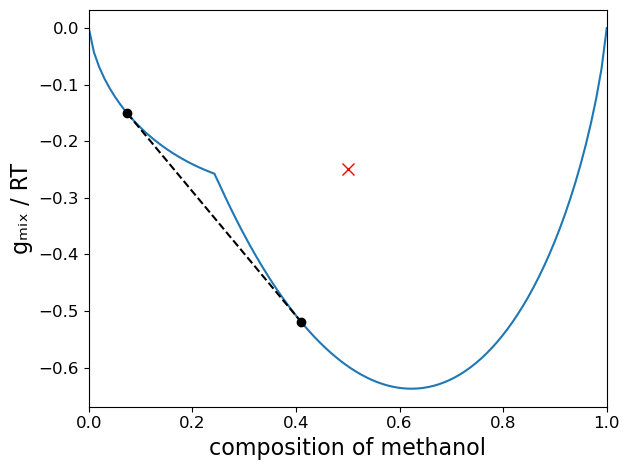

In [167]:
(x_sol,ϕ,G) = tp_flash(model,1.2e6,433.15,[0.3,0.7])
X = Clapeyron.Fractions.FractionVector.(x_sol[:,1])
g_sol = mixing.(model,1.2e6,433.15,X,gibbs_free_energy)/8.314/298.15
plt.clf()
plt.plot(x,g_mix,linestyle="-")
plt.plot(0.5,mixing(model,1e5,320.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15,marker="x",color="r",markersize=8)
plt.plot(x_sol[:,1],g_sol,linestyle="--",color="k",marker="o")

plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
# plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_2.pdf")

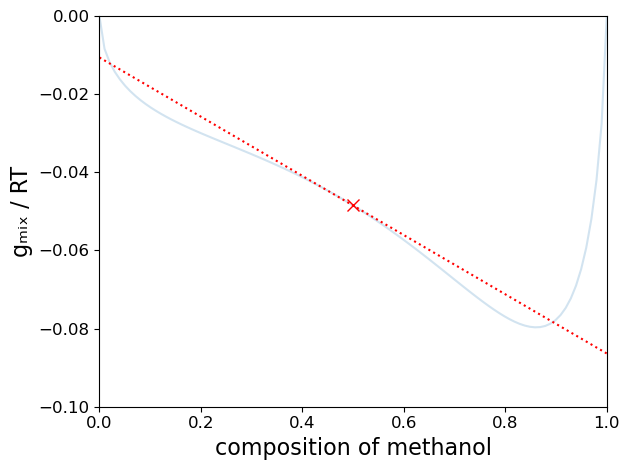

In [26]:
μ = chemical_potential(model,1e5,298.15,[0.5,0.5])/8.314/298.15
plt.clf()
plt.plot(x,g_mix,linestyle="-",alpha=0.2)
plt.plot(0.5,mixing(model,1e5,298.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15,marker="x",color="r",markersize=8)
plt.plot(x,(μ[2]-μ[1])*(x.-0.5).+g_init,color="r",linestyle=":")


plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_3.pdf")

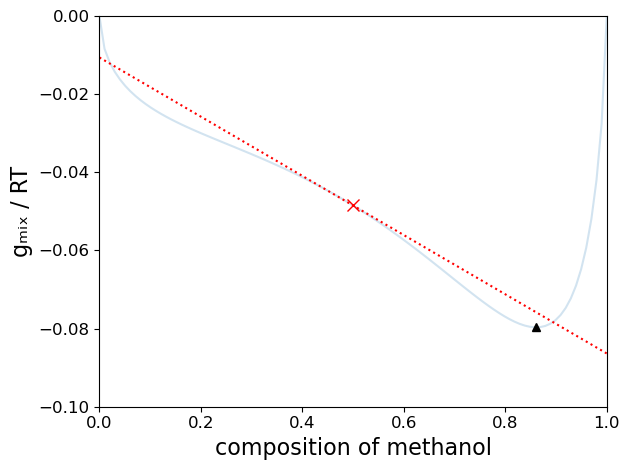

In [27]:
μ = chemical_potential(model,1e5,298.15,[0.5,0.5])/8.314/298.15
plt.clf()
plt.plot(x,g_mix,linestyle="-",alpha=0.2)
plt.plot(0.5,mixing(model,1e5,298.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15,marker="x",color="r",markersize=8)
plt.plot(x,(μ[2]-μ[1])*(x.-0.5).+g_init,color="r",linestyle=":")
plt.plot(0.86,mixing(model,1e5,298.15,[0.86,0.14],gibbs_free_energy)/8.314/298.15,color="k",marker="^")


plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_4.pdf")

In [11]:
x_cand = [0.25 0.75 -4.02901049858986; 0.75 0.25 -4.231255345235742; 0.793638586631434 0.20636141336856595 -4.255010578067569]
x_cand_stb = [0.25 0.75 -4.02901049858986; 0.793638586631434 0.20636141336856595 -4.255010578067569]

2×3 Matrix{Float64}:
 0.25      0.75      -4.02901
 0.793639  0.206361  -4.25501

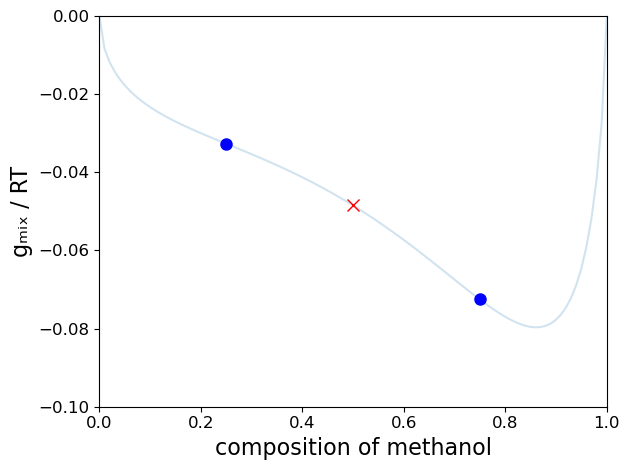

In [28]:
X_cand = Clapeyron.Fractions.FractionVector.(x_cand[:,1])
plt.clf()
plt.plot(x,g_mix,linestyle="-",alpha=0.2)
plt.plot(x_cand[1:2,1],mixing.(model,1e5,298.15,X_cand[1:2],gibbs_free_energy)/8.314/298.15,marker="o",color="b",markersize=8,linestyle="")
plt.plot(0.5,mixing(model,1e5,298.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15,marker="x",color="r",markersize=8)


plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_5.pdf")

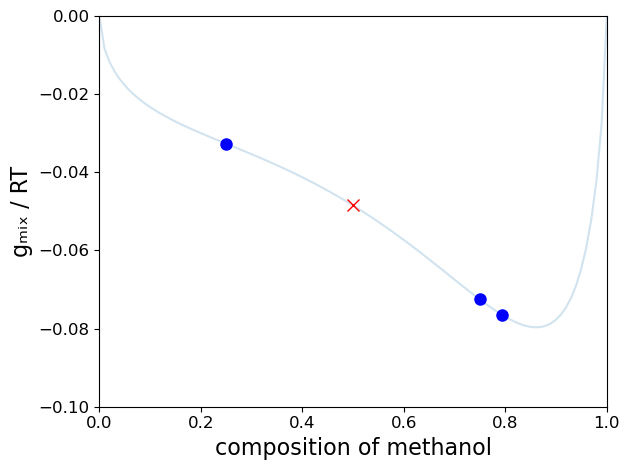

In [29]:
X_cand = Clapeyron.Fractions.FractionVector.(x_cand[:,1])
plt.clf()
plt.plot(x,g_mix,linestyle="-",alpha=0.2)
plt.plot(x_cand[:,1],mixing.(model,1e5,298.15,X_cand,gibbs_free_energy)/8.314/298.15,marker="o",color="b",markersize=8,linestyle="")
plt.plot(0.5,mixing(model,1e5,298.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15,marker="x",color="r",markersize=8)


plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_6.pdf")

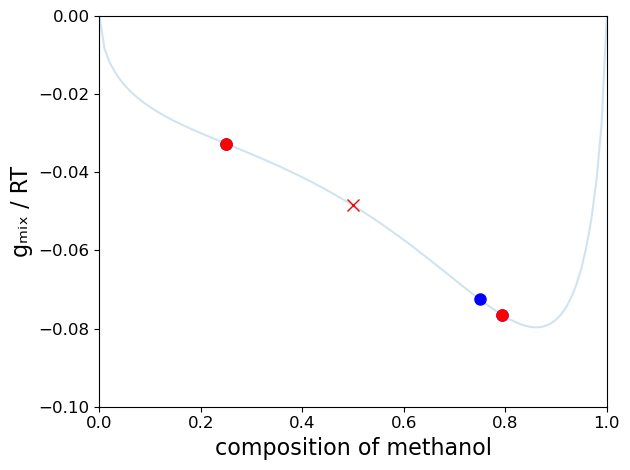

In [30]:
X_cand = Clapeyron.Fractions.FractionVector.(x_cand[:,1])
X_cand_stb = Clapeyron.Fractions.FractionVector.(x_cand_stb[:,1])
plt.clf()
plt.plot(x,g_mix,linestyle="-",alpha=0.2)
plt.plot(x_cand[:,1],mixing.(model,1e5,298.15,X_cand,gibbs_free_energy)/8.314/298.15,marker="o",color="b",markersize=8,linestyle="")
plt.plot(x_cand_stb[:,1],mixing.(model,1e5,298.15,X_cand_stb,gibbs_free_energy)/8.314/298.15,marker="o",color="r",markersize=8,linestyle="")

plt.plot(0.5,mixing(model,1e5,298.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15,marker="x",color="r",markersize=8)


plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_7.pdf")

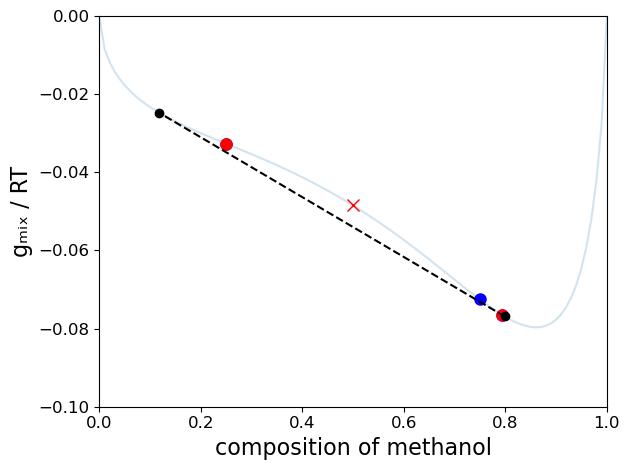

In [31]:
X_cand = Clapeyron.Fractions.FractionVector.(x_cand[:,1])
X_cand_stb = Clapeyron.Fractions.FractionVector.(x_cand_stb[:,1])
plt.clf()
plt.plot(x,g_mix,linestyle="-",alpha=0.2)
plt.plot(x_cand[:,1],mixing.(model,1e5,298.15,X_cand,gibbs_free_energy)/8.314/298.15,marker="o",color="b",markersize=8,linestyle="")
plt.plot(x_cand_stb[:,1],mixing.(model,1e5,298.15,X_cand_stb,gibbs_free_energy)/8.314/298.15,marker="o",color="r",markersize=8,linestyle="")
plt.plot(x_sol[:,1],g_sol,linestyle="--",color="k",marker="o")

plt.plot(0.5,mixing(model,1e5,298.15,[0.5,0.5],gibbs_free_energy)/8.314/298.15,marker="x",color="r",markersize=8)


plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("gₘᵢₓ / RT",fontsize=16)
plt.ylim([-0.1,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())
plt.tight_layout()
plt.savefig("HELD_8.pdf")

In [ ]:
M = Clapeyron.ℳ(model,1e5,298.15,[0.5,0.5])
M

([0.25 0.75 -1.610114037004917; 0.75 0.25 -4.534360656577476], [-13439.433214455366, -14298.299363462549])

In [ ]:
OPₓᵥ = Model(HiGHS.Optimizer)
@variable(OPₓᵥ, v)
@variable(OPₓᵥ, λ[1:nc])
@constraint(OPₓᵥ,v<=UBPⱽ)
@constraint(OPₓᵥ,[i ∈ 1:length(G)],v<=G[i]+λ*(n-ℳ[i,1:nc]))
@constraint(OPₓᵥ,[i ∈ 1:nc],λᴸ[i]<=λ[i]<=λᵁ[i])
@objective(OPₓᵥ, Max, v)